[Modelo de playground](http://playground.tensorflow.org/#activation=relu&batchSize=30&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=5,5,5&seed=0.10494&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

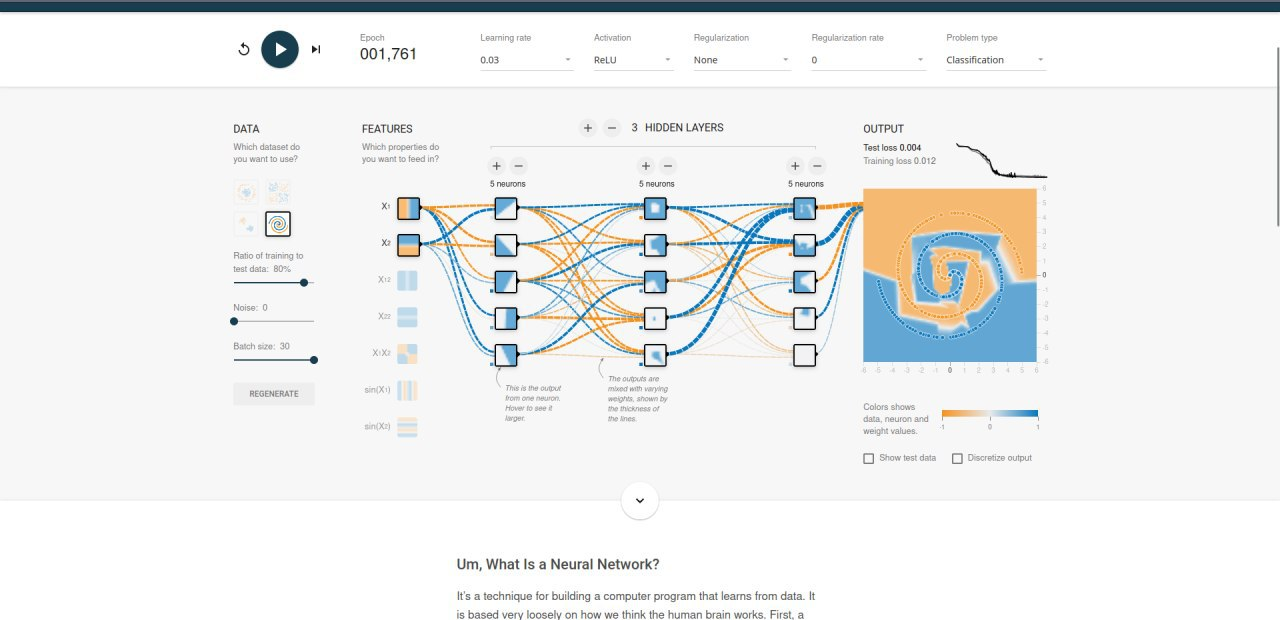

2024-04-08 14:41:53.905004: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 14:41:53.905210: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 14:41:54.104881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


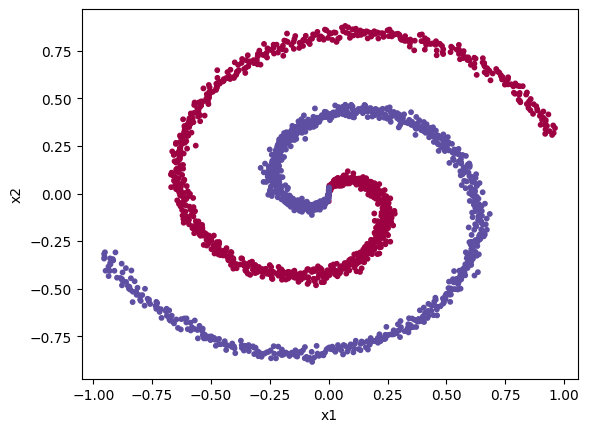

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

def generate_spiral_data(n_samples, d=1, noise=0.1):
    t = np.linspace(0, d*np.pi, n_samples)
    r1 = np.linspace(0, 1, n_samples) + noise * np.random.randn(n_samples)
    r2 = np.linspace(0, 1, n_samples) + noise * np.random.randn(n_samples)
    x1 = r1 * np.sin(2 * t)
    y1 = r1 * np.cos(2 * t)
    x2 = r2 * np.sin(2 * t + np.pi)
    y2 = r2 * np.cos(2 * t + np.pi)

    X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
    y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

    return X, y

# Generar datos de espirales
X, y = generate_spiral_data(n_samples=1000, d=1.2, noise=0.02)

# Graficar los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
def build_model(num_layers=2, neuron_seq=[5, 5]):
    model = Sequential([
        Dense(neuron_seq[0], input_shape=(2,), activation='relu')
    ])
    
    for i in range(1, num_layers):
        model.add(Dense(neuron_seq[i], activation='relu'))
        
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [5]:
all_models = [
    (2, [5,5,5]),
    (2, [32, 64, 32]),
    (3, [12, 24, 24, 12]),
    (4, [6, 12, 24, 12, 6])
]

In [8]:
# Frontera de Decisión en el espacio de los datos de entrenamiento
def plot_decision_boundary(label, pred_func, X, Y, npts = 50):
    xmin, xmax = X[:, 0].min(), X[:, 0].max()
    ymin, ymax = X[:, 1].min(), X[:, 1].max()
    dx, dy = (xmax - xmin)*0.1, (ymax - ymin)*0.1
    xx, yy = np.meshgrid(np.linspace(xmin-dx, xmax+dx, npts), np.linspace(ymin-dy, ymax+dy, npts))
    data = np.c_[xx.ravel(), yy.ravel()]
    Z = pred_func(data)
    Z = Z.reshape(xx.shape)
    plt.title(label)
    plt.contourf(xx, yy, Z, colors='k', levels=[0.48, 0.52])
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral, s=10)


#plot_decision_boundary(lambda x: model.predict(x), X, y, 50)
#plt.show()

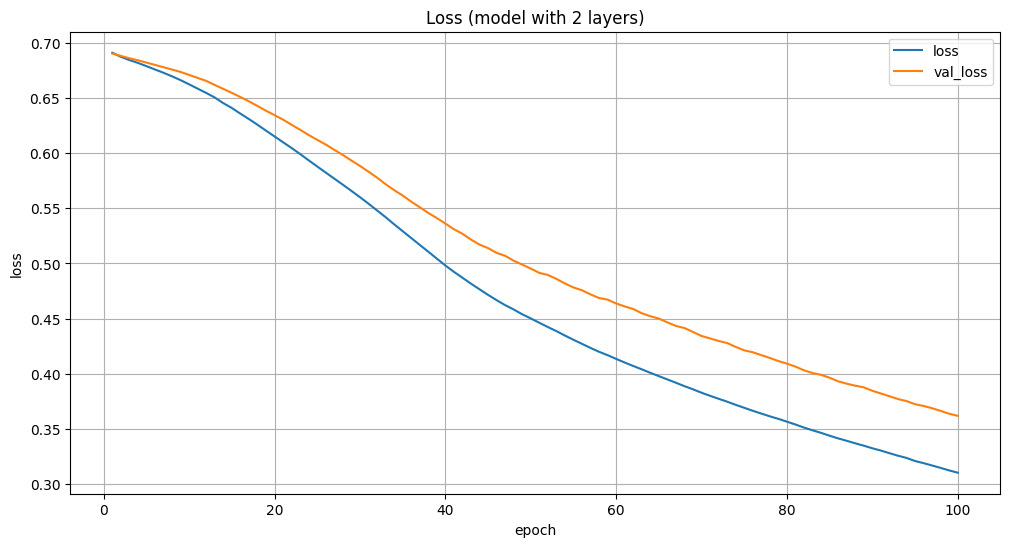

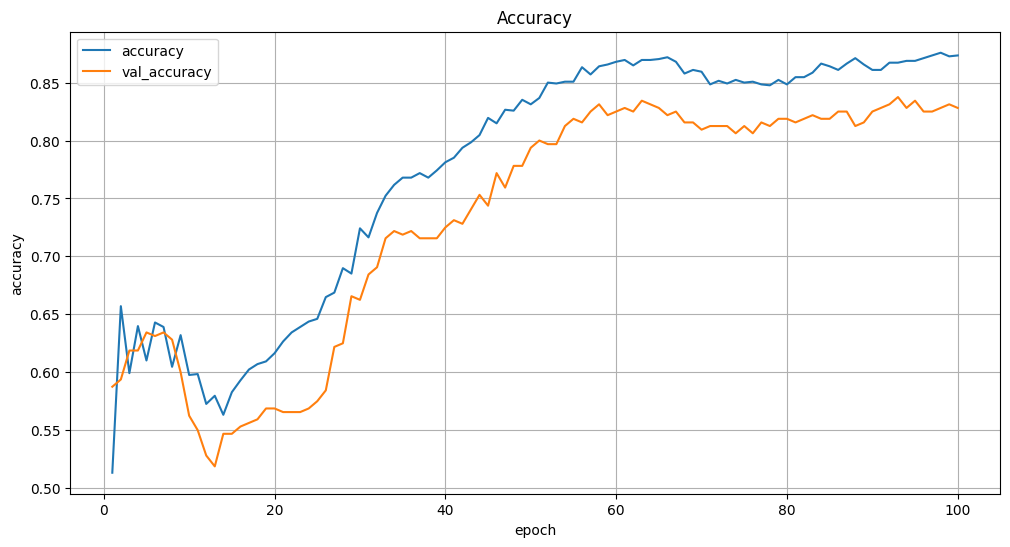

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


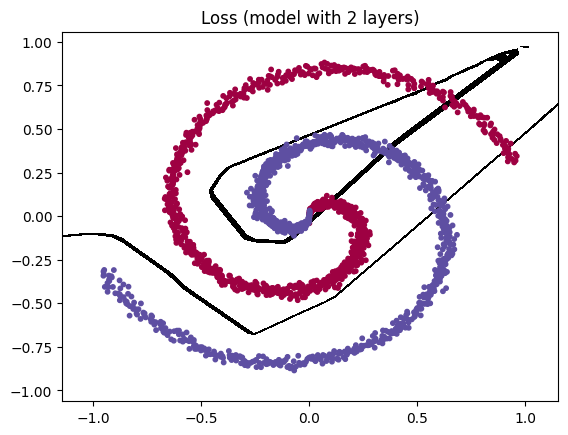

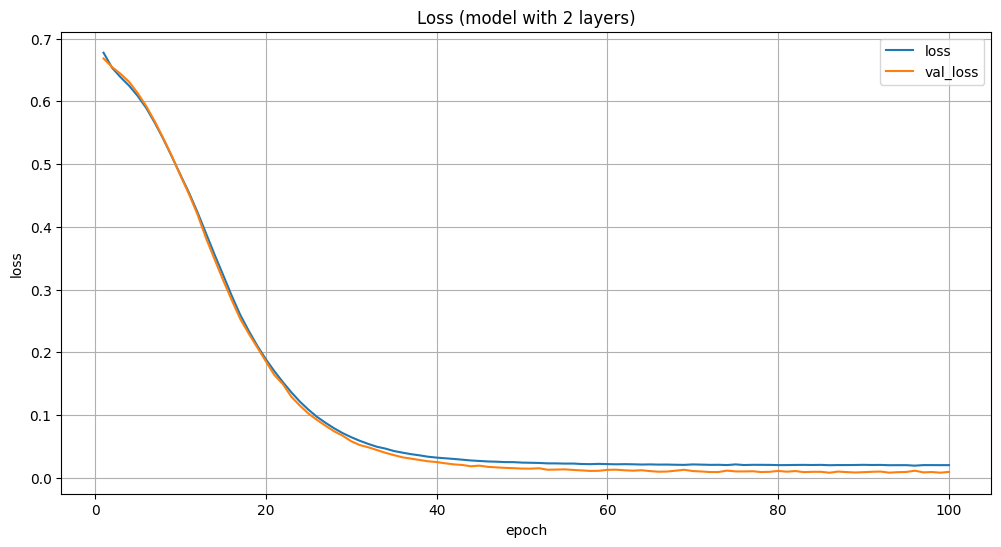

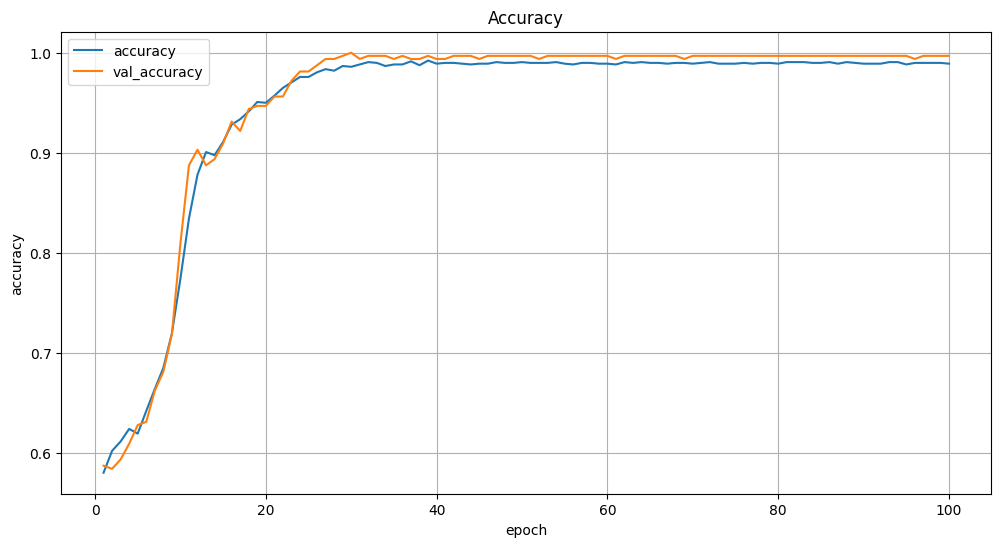

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


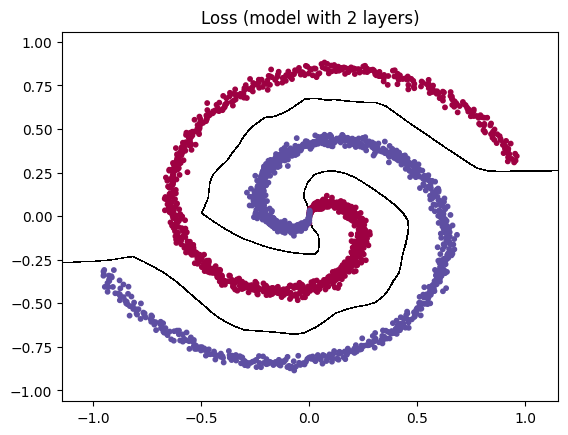

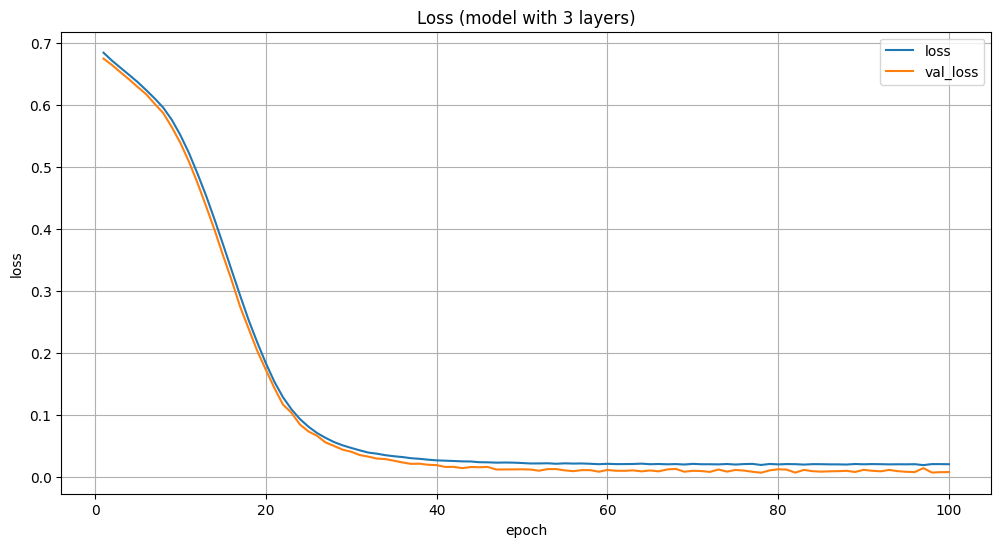

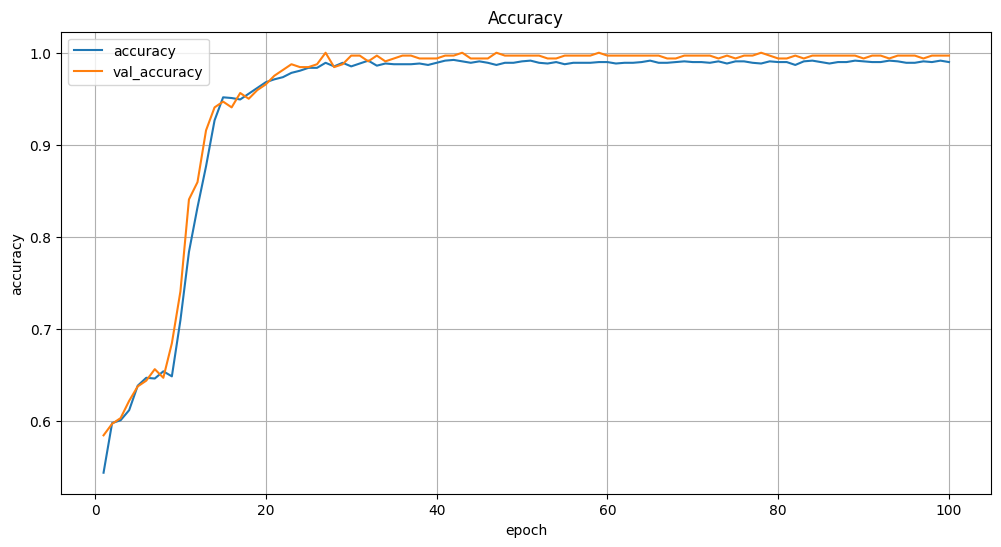

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


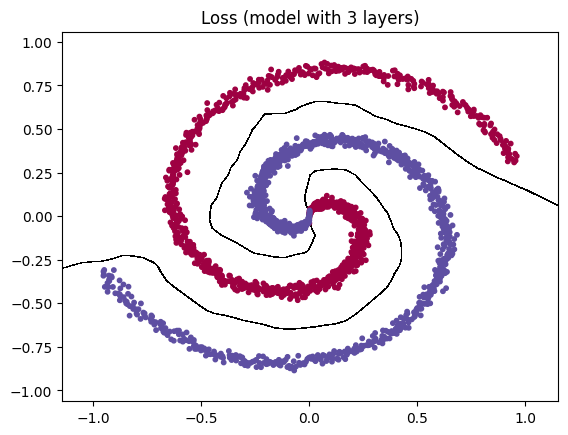

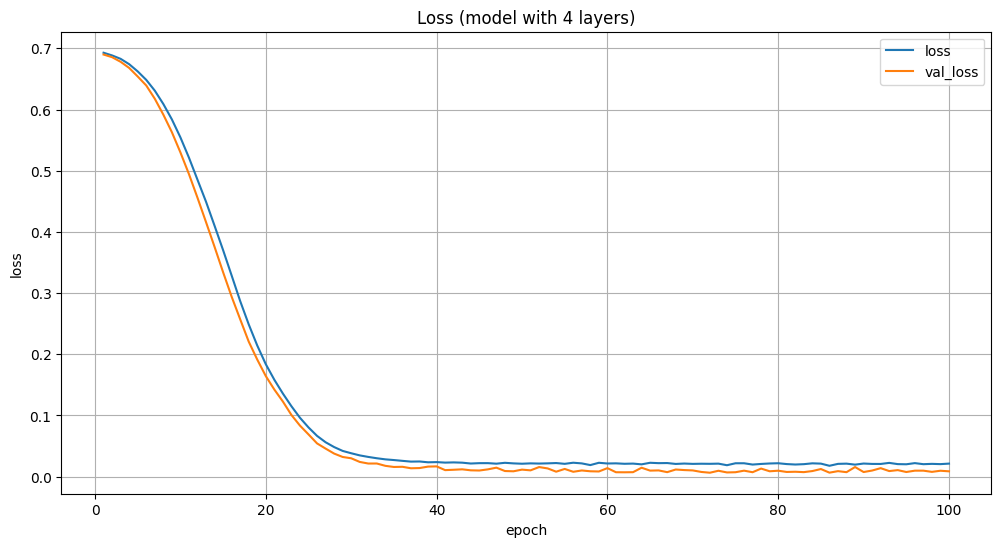

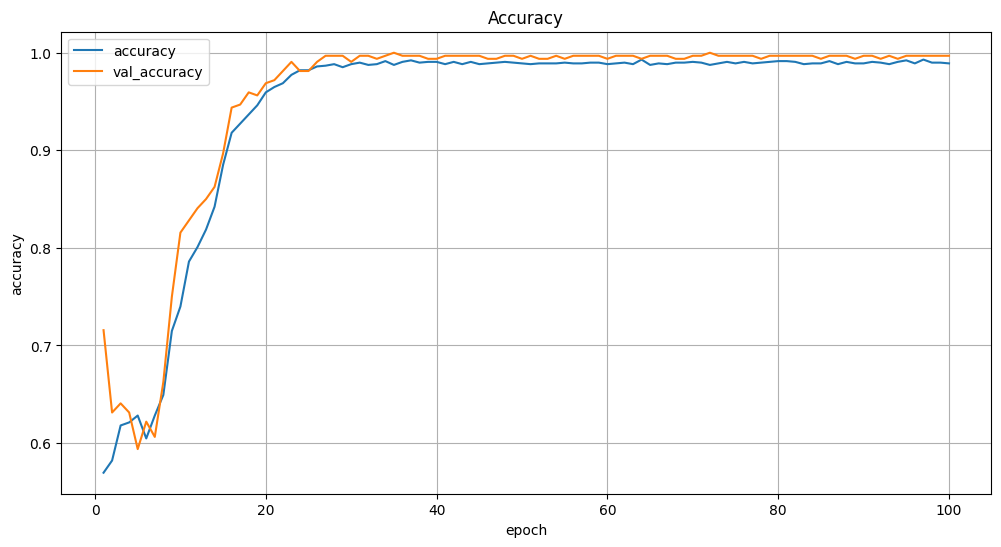

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


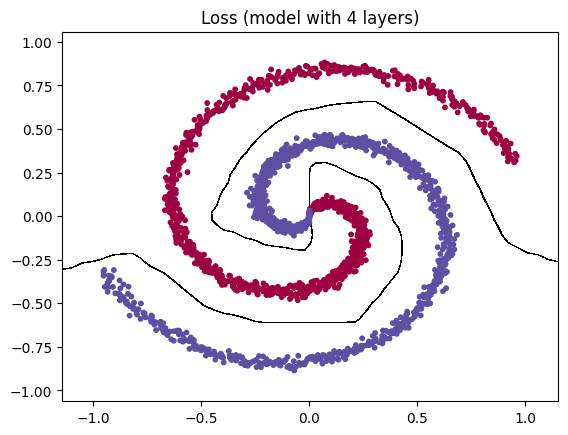

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for num_layers, neuron_seq in all_models:
    model = build_model(num_layers, neuron_seq)

    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, verbose=0,
                    batch_size=32, validation_split=0.2)

    loss_train = history.history['loss']
    loss_val = history.history['val_loss']
    accuracy_train = history.history['accuracy']
    accuracy_val = history.history['val_accuracy']
    epochs = range(1, len(loss_train) + 1)

    # Loss
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, loss_train, label='loss')
    plt.plot(epochs, loss_val, label='val_loss')
    plt.title(f'Loss (model with {num_layers} layers)')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, accuracy_train, label='accuracy')
    plt.plot(epochs, accuracy_val, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plot_decision_boundary(f'Loss (model with {num_layers} layers)', lambda x: model.predict(x), X, y, 50)
    plt.show()